# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.1A: Greedy policy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

Let's define an interface of a policy. For a start, the policy should know how many actions it can take and able to take a particular action given that policy

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a greedy policy based on the policy interface. The greedy policy will take the most rewarding action (i.e greedy). This is implemented in the act() function. In addition, we will maintain the name of the policy (name), the rewards it has accumulated for each action (total_rewards), and the number of times an action has been performed (total_counts).

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

We are now ready to perform our first simulation. Let's set some parameters.

In [4]:
evaluation_seed = 8026
num_actions = 5
trials = 10000
distribution = "bernoulli"

Now, put the pieces together and run the experiment.

Distribution: bernoulli [0.4561754  0.22507755 0.82070893 0.05221751 0.03428511]
Optimal arm: 2


<Figure size 720x360 with 0 Axes>

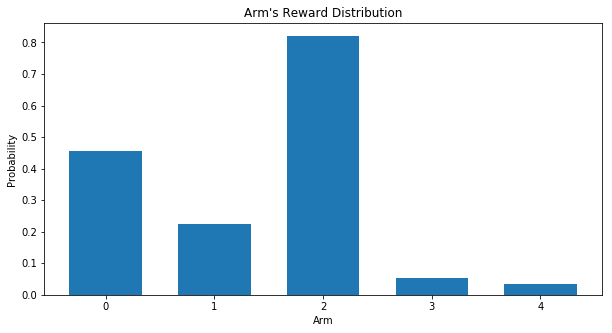

--------------------------------------------------
Policy: Greedy 
Average Reward: 0.4586 
Average Regret: 0.3646027658185429
Arm pulls: [9.996e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00]


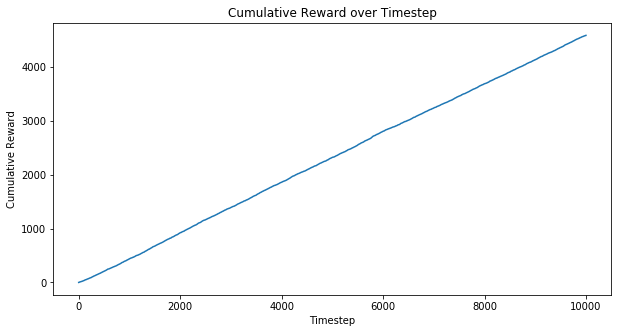

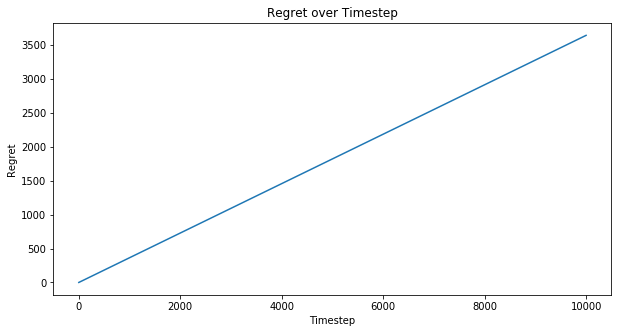

In [5]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = Greedy(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Observe the above results and answer the lab questions!

### Exercise 2.1B: Round Robin

In [2]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [3]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [4]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

We have seen in the previous exercise that a greedy policy can lock into sub-optimal action. Could it be worse than a simple round-robin selection?

Let's implement a round robin policy: that is "pulling" the arms in round robin fashion. So for example, if you have three arms, the sequence will be arm 1, arm 2, arm 3 and then back to arm 1, and so on, until the trials finishes. 

We have given you some boiler plate code, you only need to modify the part as indicated.

In [8]:
class RoundRobin(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Round Robin"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.previous_action = None #keep track of previous action
    
    def act(self):
        """Implement Round Robin here"""
        if self.previous_action is None: self.previous_action = self.num_actions - 1
        current_action = (self.previous_action + 1) % self.num_actions
        self.previous_action = current_action
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1    

Now let's run the same simulation and keep the parameters as the previous exercise.

In [17]:
evaluation_seed = 8026
num_actions = 5
trials = 10000
distribution = "bernoulli"

Distribution: bernoulli [0.4561754  0.22507755 0.82070893 0.05221751 0.03428511]
Optimal arm: 2


<Figure size 720x360 with 0 Axes>

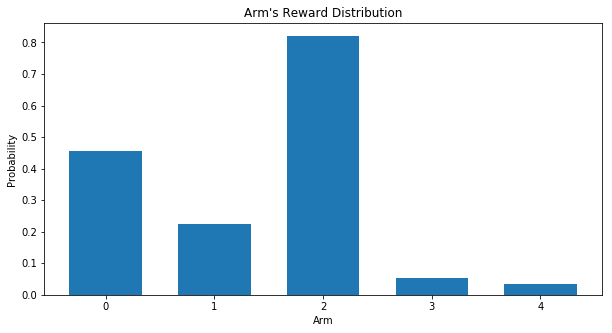

--------------------------------------------------
Policy: Round Robin 
Average Reward: 0.32 
Average Regret: 0.5030160284732659
Arm pulls: [2000. 2000. 2000. 2000. 2000.]


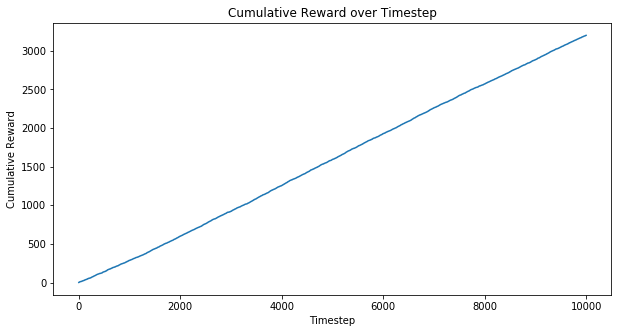

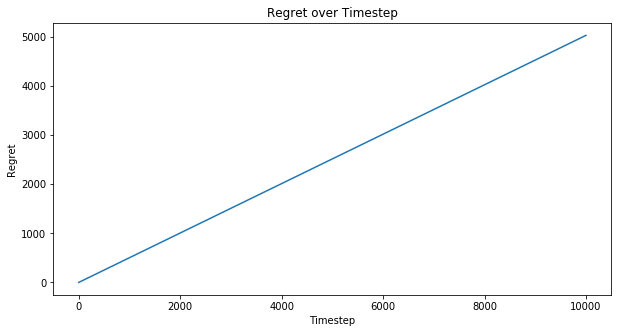

In [18]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = RoundRobin(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Observe the above results. Did the round-robin beat the greedy algorithm in this case?


Once you have answered the questions in this lab, play around with different evaluation_seed and/or num_actions. Essentially creating a different version of the BanditEnv environment. Run the simulation and observe the results.


## Lab 2: Bandits

### Exercise 2.2A: Epsilon Greedy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Now let's implement an epsilon greedy policy based on the policy interface. The epsilon greedy policy will make sure we explore (i.e taking random actions) as set by the epsilon value, and take the most rewarding action (i.e greedy) the rest of the times. This is implemented in the act() function. 

In [4]:
#Epsilon Greedy policy
class EpsilonGreedy(Greedy):
    def __init__(self, num_actions, epsilon):
        Greedy.__init__(self, num_actions)
        if (epsilon is None or epsilon < 0 or epsilon > 1):
            print("EpsilonGreedy: Invalid value of epsilon", flush = True)
            sys.exit(0)
            
        self.epsilon = epsilon
        self.name = "Epsilon Greedy"
    
    def act(self):
        choice = None
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice == 1:
            return np.random.choice(self.num_actions)
        else:
            current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
            current_averages[self.total_counts <= 0] = 0.5  #Correctly handles Bernoulli rewards; over-estimates otherwise
            current_action = np.argmax(current_averages)
            return current_action
        

Now let's prepare the simulation. We'll use a different seed and have 10 arms/actions instead of 5.

In [5]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"

First, let's use epsilon = 0. Run the simulation and observe the results.

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

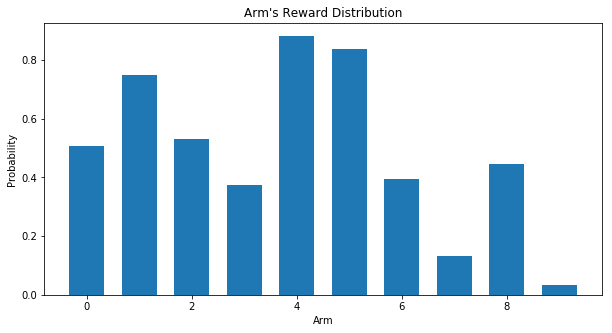

--------------------------------------------------
Policy: Epsilon Greedy 
Average Reward: 0.8409 
Average Regret: 0.03955176021043847
Arm pulls: [  94.   91.  106.   91. 9106.  101.   93.  106.  107.  105.]


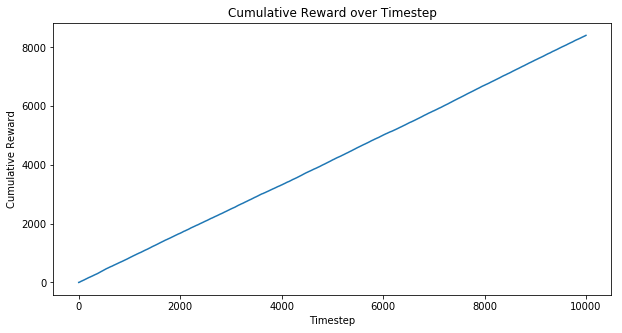

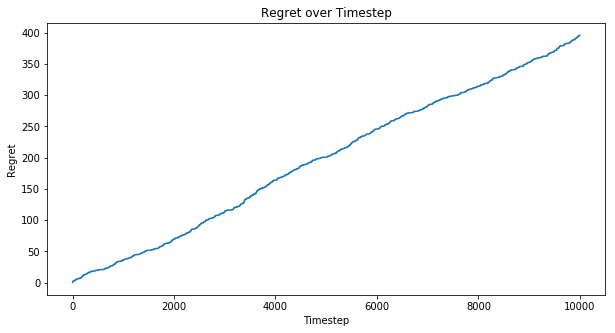

In [24]:
epsilon = 0.1
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = EpsilonGreedy(num_actions, epsilon)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

What about if epsilon = 1? Run the simulation again and observe the results.

Now, try several different number of epsilons (0.05, 0.1, 0.15). Run the simulations and observe the results.

Which epsilon performs best with this problem?

Now let's prepare another simulation by setting a different seed. 

In [25]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

Try the range of epsilons again (0, 0.05, 0.1, 0.15, 1), run the simulations and observe the results.

Which epsilon performs best with this problem?

What do you learn about setting the epsilon value?

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

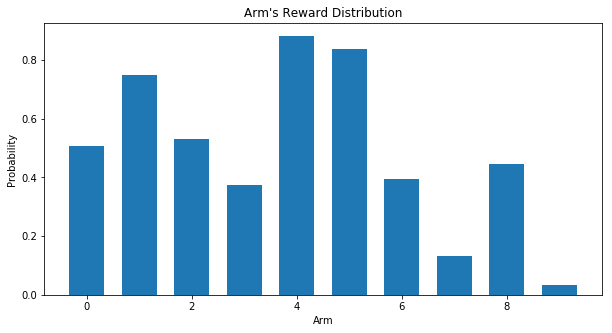

--------------------------------------------------
Policy: Epsilon Greedy 
Average Reward: 0.4854 
Average Regret: 0.3944035597739964
Arm pulls: [ 949.  943. 1030. 1025. 1053.  965. 1021. 1031. 1000.  983.]


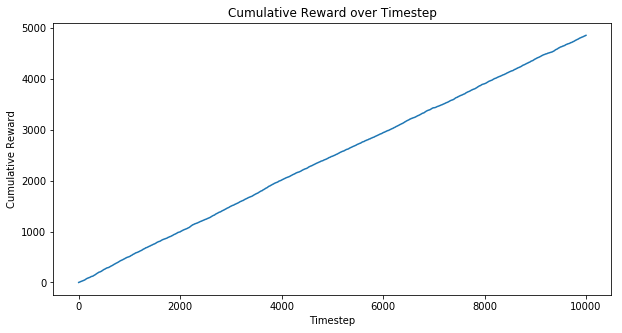

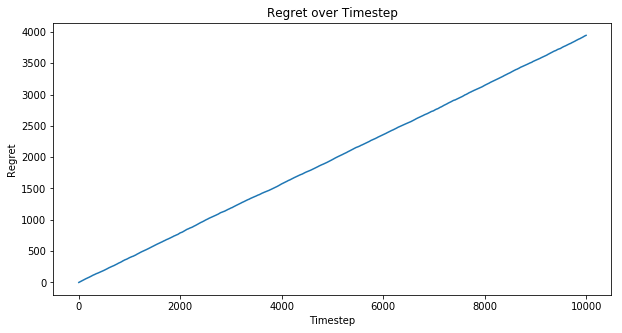

In [29]:
epsilon = 1
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = EpsilonGreedy(num_actions, epsilon)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)


### Exercise 2.2B: Optimistic Greedy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Now let's implement an optimistic greedy policy based on the policy interface. The optimistic greedy policy initialize the ra to a large initial value R, which is implemented in the __init__() function, and then play the greedy algorithm.

We have given you some boiler plate code, you only need to modify the part as indicated.

In [4]:
#Optimistic Greedy policy
class OptimisticGreedy(Greedy):
    def __init__(self, num_actions, initial_value):
        Greedy.__init__(self, num_actions)
        self.name = "Optimistic Greedy"
        
        """Implement optimistic greedy here"""
        self.total_rewards = np.ones(num_actions, dtype = np.longdouble) * initial_value
        self.total_counts = np.ones(num_actions, dtype = np.longdouble)

        

Let's prepare the simulation. We'll use the same parameters as the exercise with the epsilon greedy.

In [5]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"

First, let's use R = 0. Run the simulation and observe the results.

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

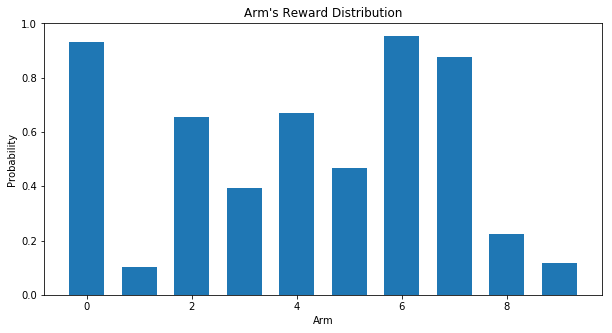

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9505 
Average Regret: 0.002198560767003792
Arm pulls: [1.600e+01 4.000e+00 8.000e+00 6.000e+00 1.100e+01 8.000e+00 9.907e+03
 4.200e+01 4.000e+00 4.000e+00]


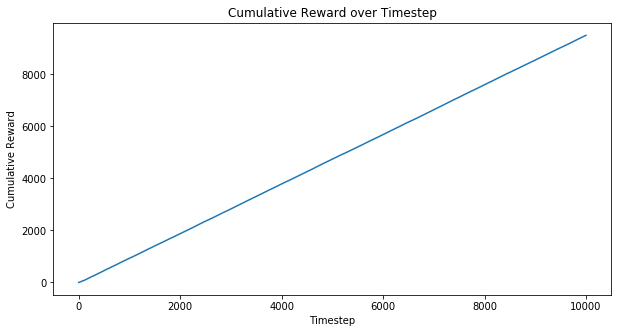

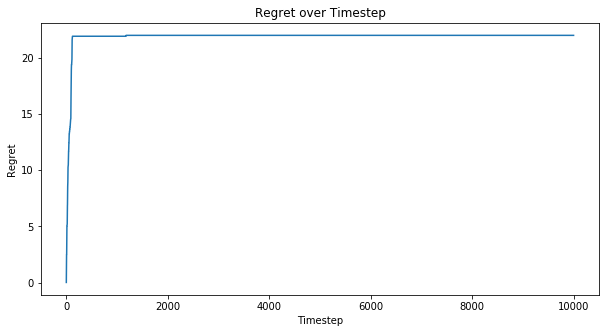

In [9]:
R = 3
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

What about if R is a very large number? Say 10000, the same number as the number of trials? Run the simulation again and observe the results.

Now, try several different number of R (1, 3, 5). Run the simulations and observe the results.

Which epsilon performs best with this problem?

Now let's prepare another simulation by setting a different seed. 

In [7]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

Try the range of R again (0, 1, 3, 5, 10000), run the simulations and observe the results.

### Exercise 2.3: UCB

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

In [4]:
#Epsilon Greedy policy
class EpsilonGreedy(Greedy):
    def __init__(self, num_actions, epsilon):
        Greedy.__init__(self, num_actions)
        if (epsilon is None or epsilon < 0 or epsilon > 1):
            print("EpsilonGreedy: Invalid value of epsilon", flush = True)
            sys.exit(0)
            
        self.epsilon = epsilon
        self.name = "Epsilon Greedy"
    
    def act(self):
        choice = None
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice == 1:
            return np.random.choice(self.num_actions)
        else:
            current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
            current_averages[self.total_counts <= 0] = 0.5  #Correctly handles Bernoulli rewards; over-estimates otherwise
            current_action = np.argmax(current_averages)
            return current_action
        

Now let's implement a UCB algorithm. 



In [5]:
#UCB policy
class UCB(Greedy):
    def __init__(self, num_actions):
        Greedy.__init__(self, num_actions)
        self.name = "UCB"
        self.round = 0
        
    def act(self):
        current_action = None
        self.round += 1
        if self.round <= self.num_actions:
            """The first k rounds, where k is the number of arms/actions, play each arm/action once"""
            current_action = self.round - 1
        else:
            """At round t, play the arms with maximum average and exploration bonus"""
            current_averages = np.divide(self.total_rewards + np.sqrt(np.log(self.round) * self.total_counts), self.total_counts, where = self.total_counts > 0) + np.sqrt(np.divide(2*np.log(self.round), self.total_counts, where = self.total_counts > 0))
#             current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
            current_action = np.argmax(current_averages)
        return current_action

Now let's prepare the simulation. 

In [6]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

What do you think the regret graph would look like?

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

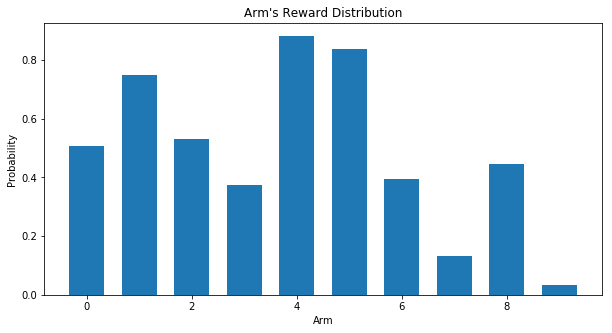

--------------------------------------------------
Policy: UCB 
Average Reward: 0.8037 
Average Regret: 0.07278350471778577
Arm pulls: [ 184.  961.  257.  126. 5235. 2783.  150.   79.  162.   63.]


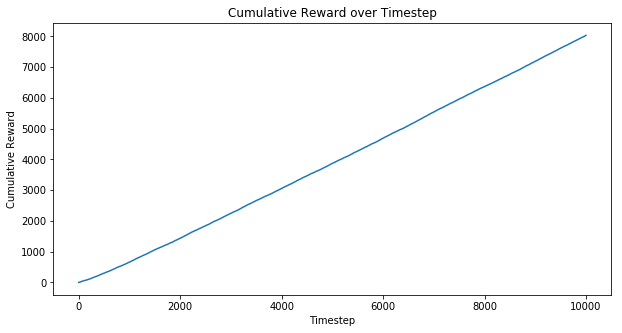

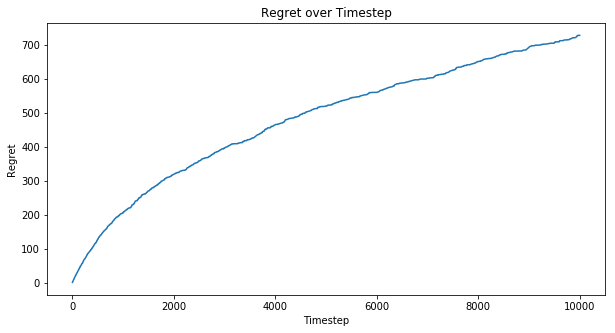

In [7]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = UCB(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

 ### Exercise 2.4 Thompson Beta

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [3]:
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        
        p = np.random.beta(1 + self.successes, 1 + self.failures)
        
        """Play the max of the sampled values"""
        
        current_action = np.argmax(p)
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [4]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "normal"


What do you think the regret graph would look like?

Distribution: normal (array([ 1.67210906,  0.04144904, -2.26004314,  0.55185287, -0.99557374,
       -0.2838564 , -0.50553487, -0.05963477, -0.54748047,  0.61487342]), array([0.16003572, 0.39623439, 0.70679209, 0.13345484, 0.97314585,
       0.28711056, 0.11221114, 0.52693607, 0.53345874, 0.62434873]))
Optimal arm: 0
--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 0.5539040951877393 
Average Regret: 1.1173689000540807
Arm pulls: [3.300e+01 1.000e+00 1.000e+00 9.954e+03 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 6.000e+00]


<Figure size 720x360 with 0 Axes>

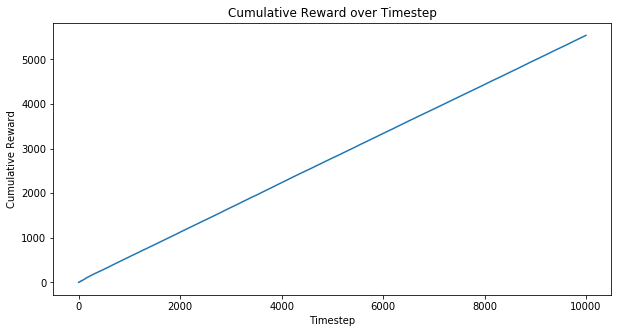

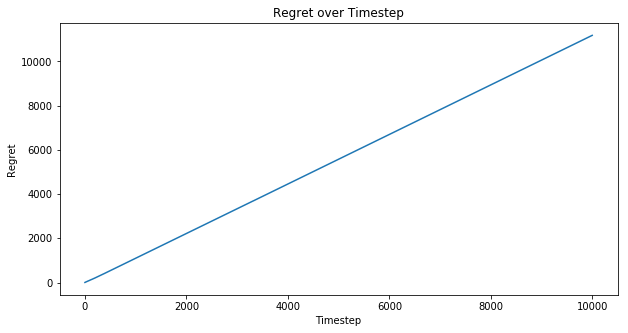

In [5]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?